In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-white.csv',sep=';')
df_plain=pd.read_csv('winequality-white.csv',sep=';')

In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# What to predict?

<bound method DataFrame.mean of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.172079         -0.081762     0.213258        2.821061  -0.035351   
1         -0.657434          0.215874     0.047996       -0.944669   0.147732   
2          1.475600          0.017450     0.543783        0.100272   0.193503   
3          0.409083         -0.478608    -0.117266        0.415726   0.559670   
4          0.409083         -0.478608    -0.117266        0.415726   0.559670   
...             ...               ...          ...             ...        ...   
4893      -0.775936         -0.677032    -0.365159       -0.944669  -0.309976   
4894      -0.301928          0.414297     0.213258        0.317146   0.056190   
4895      -0.420430         -0.379397    -1.191470       -1.023532  -0.218435   
4896      -1.605449          0.116662    -0.282528       -1.043248  -1.088081   
4897      -1.012940         -0.677032     0.378521       -1.102396  -1.179623

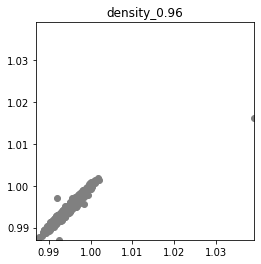

<bound method DataFrame.mean of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.172079         -0.081762     0.213258        2.821061  -0.035351   
1         -0.657434          0.215874     0.047996       -0.944669   0.147732   
2          1.475600          0.017450     0.543783        0.100272   0.193503   
3          0.409083         -0.478608    -0.117266        0.415726   0.559670   
4          0.409083         -0.478608    -0.117266        0.415726   0.559670   
...             ...               ...          ...             ...        ...   
4893      -0.775936         -0.677032    -0.365159       -0.944669  -0.309976   
4894      -0.301928          0.414297     0.213258        0.317146   0.056190   
4895      -0.420430         -0.379397    -1.191470       -1.023532  -0.218435   
4896      -1.605449          0.116662    -0.282528       -1.043248  -1.088081   
4897      -1.012940         -0.677032     0.378521       -1.102396  -1.179623

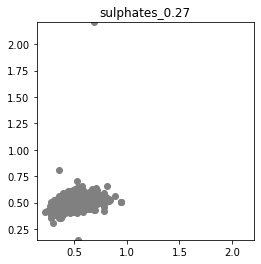

In [5]:
max_corr=['name',0]
min_corr=['name',1]

for output in ['density','sulphates']:
    X=df.drop(columns=output)
    y=df[output]
    
    #normalize
    X=(X-X.mean())/X.std()
    print(X.mean,X.std)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm


    y_pred = regressor.predict(X_test)

    min_=min([min(y_test),min(y_pred)])
    max_=max([max(y_test),max(y_pred)])
    plt.scatter(y_test,y_pred,  color='gray')
    plt.xlim(min_, max_)
    plt.ylim(min_, max_)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(output+'_'+str(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2)))
    # plt.plot(y_pred, color='red', linewidth=2)
    plt.show()
    if np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))>max_corr[1]:
        max_corr[1]=np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))
        max_corr[0]=output
        y_pred_max=y_pred
        y_test_max=y_test
    if np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))<min_corr[1]:
        min_corr[1]=np.abs(np.round(np.corrcoef(y_test,y_pred)[0][1],decimals=2))
        min_corr[0]=output
        y_pred_min=y_pred
        y_test_min=y_test

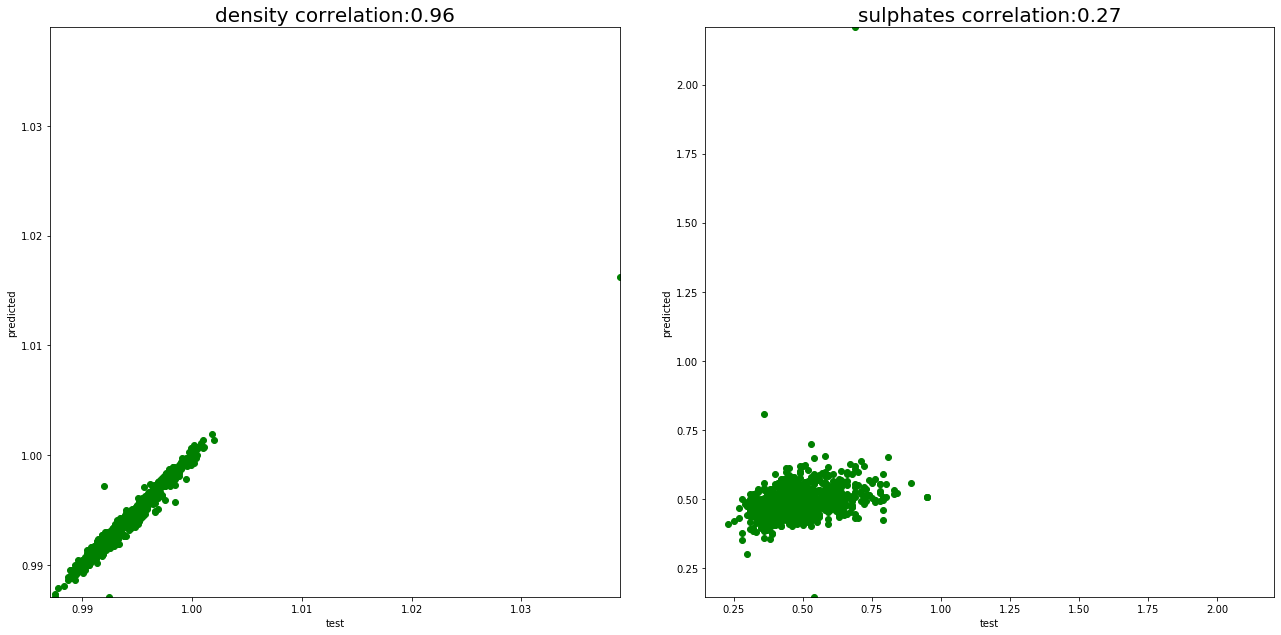

In [6]:
size_x,size_y=20,40
title_size=20

min_=min([min(y_test_max),min(y_pred_max)])
max_=max([max(y_test_max),max(y_pred_max)])
plt.figure(figsize=(size_x,size_y))

plt.subplot(1,2,1)
plt.scatter(y_test_max,y_pred_max,  color='green')
plt.xlim(min_, max_)
plt.ylim(min_, max_)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(max_corr[0]+' correlation:'+str(max_corr[1]),size=title_size)
plt.xlabel('test')
plt.ylabel('predicted')

plt.subplot(1,2,2)
min_=min([min(y_test_min),min(y_pred_min)])
max_=max([max(y_test_min),max(y_pred_min)])
plt.scatter(y_test_min,y_pred_min,  color='green')
plt.xlim(min_, max_)
plt.ylim(min_, max_)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(min_corr[0]+' correlation:'+str(min_corr[1]),size=title_size)
plt.xlabel('test')
plt.ylabel('predicted')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.15)


plt.show()

In [7]:
print('max',max_corr[0],'\n','min:',min_corr[0])
maximim=False

max density 
 min: sulphates


### remove outliers <0.5 >0.95 percentile:

In [8]:
if maximim==True:
    predict=max_corr[0]
else:
    predict=min_corr[0]
remove_outliers=True

In [9]:
predict

'sulphates'

In [10]:
import copy
df=copy.deepcopy(df_plain)
remove_outliers=True

In [11]:
shape_orig=df.shape[0]
#removal of the 0-1 percentile and 99-100% of the values furthest away from the mean
#I will do my prediction of 'sulphates' therefore I do not remove its outliers
predict='sulphates'
# predict='density'
remove_lim=0.001

lim_high,lim_low=1-remove_lim,remove_lim

if remove_outliers==True:
    features=[cols for cols in df.columns if cols != predict]
    print(50*'_')
    index_names=[]
    #FOR all FEATURES get the percentile and add the indexes to a list (index_names)
    for feat in features:
        y = df[feat]
        removed_outliers = y.between(y.quantile(lim_low), y.quantile(lim_high))
#         print(feat,'\n',removed_outliers.value_counts())
        for index in list(df[~removed_outliers].index):
            if index not in index_names:
                index_names.append(index)
    #when all are added remove them
    df.drop(index_names, inplace=True)
    remove_outliers=False
print('% of data dropped',100*(1-(df.shape[0]/shape_orig)))

__________________________________________________
% of data dropped 1.3679052674561043


In [12]:
df.shape[0]/df_plain.shape[0]


0.986320947325439

In [13]:
# for cols in df.columns:
#     df[cols+'sin']=[np.sin(i) for i in df[cols]]
#     df[cols+'exp']=[np.exp(i) for i in df[cols]]
#     df[cols+'cos']=[np.cos(i) for i in df[cols]]

## regularization

In [14]:


from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid)

import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import rlr_validate

In [15]:
X=df.drop(columns=predict).values
y=df[predict].values
attributeNames = [name for name in df.drop(columns=predict)]
N, M = X.shape


# X['Offset']=[1 for i in X.iloc()]



X = np.concatenate((np.ones((X.shape[0],1)),X),1)
attributeNames = [u'Offset']+attributeNames
M = M+1



K = 5
CV = model_selection.KFold(K, shuffle=True)
lambdas = np.power(10.,np.linspace(-5,10,num=10))
lambdas



Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
w_rlr = np.empty((M,K))
lambdas_opt=np.empty(K)
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

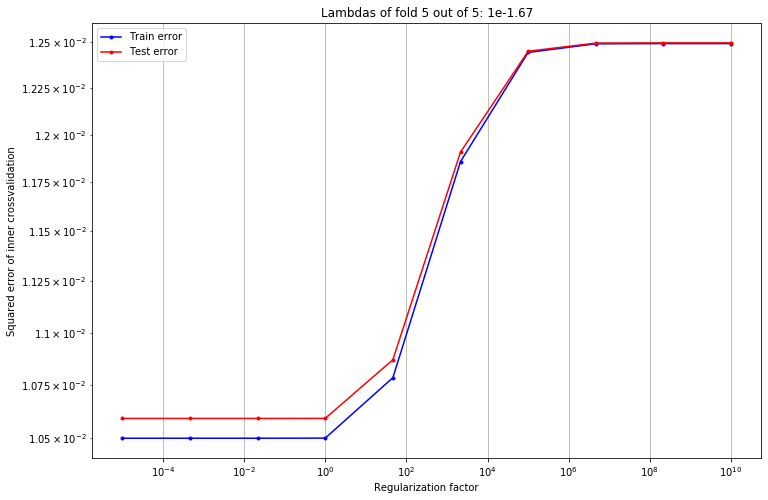

Linear regression without feature selection: sulphates
- Training error: 0.010874180022076218
- Test error:     0.010958642682269
- R^2 train:     0.16355199003909865
- R^2 test:     0.15586206915889167

Regularized linear regression: sulphates
- Training error: 0.010874180174487049
- Test error:     0.010958660224499329
- R^2 train:     0.16355197831557236
- R^2 test:     0.15586071789099817

Weights in last fold:
         Offset            0.49
  fixed acidity           -0.05
volatile acidity            -0.0
    citric acid             0.0
 residual sugar           -0.14
      chlorides           -0.01
free sulfur dioxide             0.0
total sulfur dioxide             0.0
        density            0.23
             pH           -0.02
        alcohol             0.1
        quality            0.01
Ran Exercise 8.1.1


In [16]:
k=0
for train_index, test_index in CV.split(X,y):

    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10    

    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    lambdas_opt[k]=opt_lambda
    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)

    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :] ) / sigma[k, :] 
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :] ) / sigma[k, :] 

    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum(axis=0)/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]

    # Estimate weights for unregularized linear regression, on entire training set
    w_noreg[:,k] = np.linalg.solve(XtX,Xty).squeeze()
    # Compute mean squared error without regularization
    Error_train[k] = np.square(y_train-X_train @ w_noreg[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test[k] = np.square(y_test-X_test @ w_noreg[:,k]).sum(axis=0)/y_test.shape[0]
    # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
    #m = lm.LinearRegression().fit(X_train, y_train)
    #Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    #Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Display the results for the last cross-validation fold
    if k == K-1:
        figure(k, figsize=(12,8))
#         subplot(1,2,1)
#         semilogx(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
#         xlabel('Regularization factor')
#         ylabel('Mean Coefficient Values')
#         grid()
#         # You can choose to display the legend, but it's omitted for a cleaner 
#         # plot, since there are many attributes
#         legend(attributeNames[1:], loc='best')

#         subplot(1,2,2)
        title('Lambdas of fold '+str(k+1)+' out of '+str(K)+': 1e{0}'.format(np.round(np.log10(opt_lambda),decimals=2)))
        loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r.-')
        xlabel('Regularization factor')
        ylabel('Squared error of inner crossvalidation')
        legend(['Train error','Test error'])
        grid()
        
    # To inspect the used indices, use these print statements
    #print('Cross validation fold {0}/{1}:'.format(k+1,K))
    #print('Train indices: {0}'.format(train_index))
    #print('Test indices: {0}\n'.format(test_index))

    k+=1

show()
# Display results
print('Linear regression without feature selection:',predict)
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Regularized linear regression:',predict)
print('- Training error: {0}'.format(Error_train_rlr.mean()))
print('- Test error:     {0}'.format(Error_test_rlr.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_rlr.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test_rlr.sum())/Error_test_nofeatures.sum()))

print('Weights in last fold:')
for m in range(M):
    print('{:>15} {:>15}'.format(attributeNames[m], np.round(w_rlr[m,-1],2)))

print('Ran Exercise 8.1.1')

In [17]:
df.drop(columns=predict).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'alcohol', 'quality'],
      dtype='object')

In [18]:
X=df.drop(columns=predict)
y=df[predict]

#normalize
X=(X-X.mean())/X.std()
X=X.values
X = np.concatenate((np.ones((X.shape[0],1)),X),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lambdaI = np.mean(lambdas_opt) * np.eye(M)
lambdaI[0,0] = 0

w_rlr=np.mean(w_rlr,1)

Xty = X_train.T @ y_train
XtX = X_train.T @ X_train
Error_train_final = np.square(y_train-X_train @ w_rlr).sum(axis=0)/y_train.shape[0]
Error_test_final = np.square(y_test-X_test @ w_rlr).sum(axis=0)/y_test.shape[0]

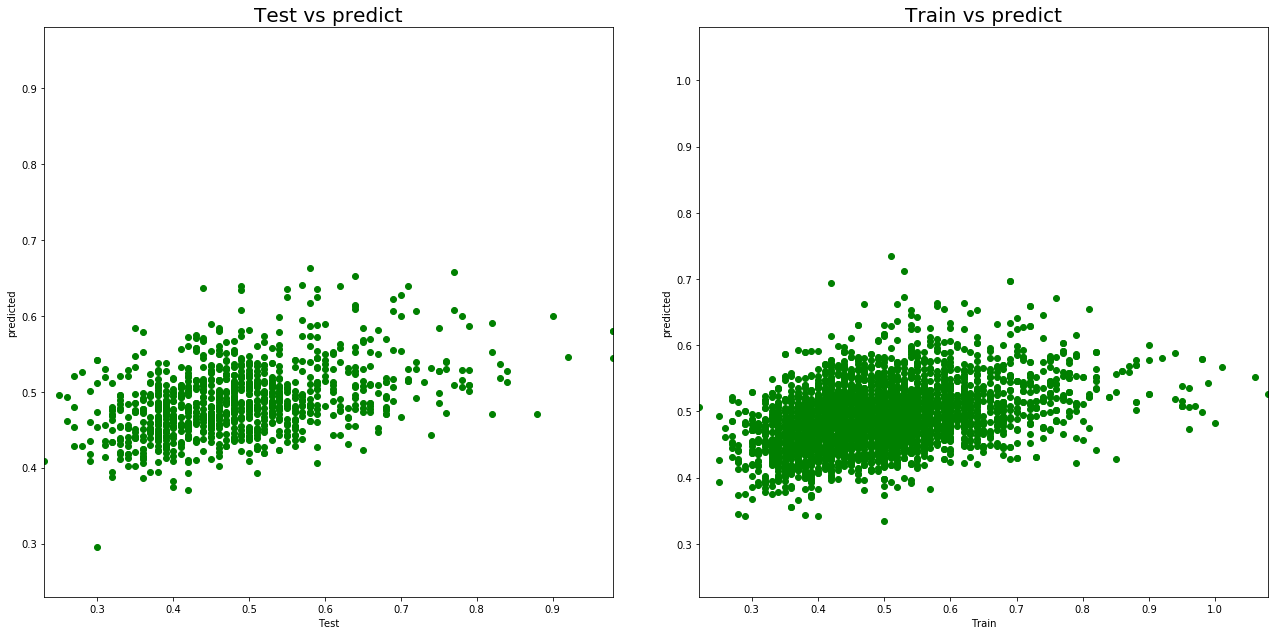

In [19]:
y_test_max=y_test
y_pred_max=X_test @ w_rlr

y_test_min=y_train
y_pred_min=X_train @ w_rlr

size_x,size_y=20,40
title_size=20

min_=min([min(y_test_max),min(y_pred_max)])
max_=max([max(y_test_max),max(y_pred_max)])
plt.figure(figsize=(size_x,size_y))

plt.subplot(1,2,1)
plt.scatter(y_test_max,y_pred_max,  color='green')
plt.xlim(min_, max_)
plt.ylim(min_, max_)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Test vs predict',size=title_size)
plt.xlabel('Test')
plt.ylabel('predicted')

plt.subplot(1,2,2)
min_=min([min(y_test_min),min(y_pred_min)])
max_=max([max(y_test_min),max(y_pred_min)])
plt.scatter(y_test_min,y_pred_min,  color='green')
plt.xlim(min_, max_)
plt.ylim(min_, max_)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Train vs predict',size=title_size)
plt.xlabel('Train')
plt.ylabel('predicted')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.15)


plt.show()